<a href="https://colab.research.google.com/github/qTronor/BigData_lessons/blob/main/BigData_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go

from sklearn.manifold import TSNE
from tensorflow.keras.datasets import fashion_mnist

Найти и выгрузить многомерные данные


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PVK_labs/PVK_1/Airline Dataset Updated.csv")

Вывести информацию о данных при помощи методов .info(), .head().
Проверить данные на наличие пустых значений. В случае их наличия
удалить данные строки или интерполировать пропущенные значения.
При необходимости дополнительно предобработать данные для
дальнейшей работы с ними.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [ ]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [ ]:
x_axis = list(set(df["Continents"]))

data_dict = {}
for continent in range(len(x_axis)):
  data_dict[x_axis[continent]] = list(df["Continents"]).count(x_axis[continent])
print(data_dict)

{'Europe': 12335, 'South America': 10718, 'North America': 32033, 'Asia': 18637, 'Africa': 11030, 'Oceania': 13866}


In [ ]:
y_axis = list(data_dict.values())
print(y_axis)

[12335, 10718, 32033, 18637, 11030, 13866]


In [ ]:
fig.update_layout(
    xaxis_title="Континет",
    yaxis_title="Количество пассажиров",

    xaxis=dict(
        title=dict(
            font=dict(
                size=16  # Размер шрифта для подписи оси X
            )
        ),
        tickangle=315,  # Поворот меток оси X
        showgrid=True,  # Включение сетки на оси X
        gridwidth=2,    # Толщина сетки
        gridcolor='ivory'  # Цвет сетки
    ),
    yaxis=dict(
        title=dict(
            font=dict(
                size=16  # Размер шрифта для подписи оси Y
            )
        ),
        showgrid=True,  # Включение сетки на оси Y
        gridwidth=2,
        gridcolor='ivory'
    ),
)

# Установка размера текста меток осей в 14
fig.update_xaxes(tickfont=dict(size=14))
fig.update_yaxes(tickfont=dict(size=14))

fig.update_layout(
    width=None,
    height=700)

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0)
)

In [ ]:
colors = ["red", "green", "blue", "yellow", "purple"]
data = [go.Bar(
    x=x_axis,
    y=y_axis,
    marker=dict(
        color=colors,
        coloraxis="coloraxis",
        line=dict(
            color="black",
            width=2
        )
    )
)]
fig = go.Figure(data = data)

fig.update_layout(
    title={
        'text': 'Количество пассажиров по континентам',
        'x': 0.5,
        'y': 1.0,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=20
        )
    }
)

In [ ]:
fig.show()

# Задание 4

In [ ]:
fig = go.Figure(data=[go.Pie(
    labels=x_axis,
    values=y_axis,
    marker=dict(
        line=dict(
            color="black",
            width=2  # Толщина границ
        )
    ),

)])

# Настройка макета (layout)
fig.update_layout(
    title={
        'text': 'Круговая диаграмма',
        'x': 0.5,
        'y': 1.0,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=20
        )
    }
)

fig.show()

# Задание 5

In [ ]:
delayed = df[df["Flight Status"] == "Delayed"]
usa = delayed[delayed["Country Name"] == "United States"]
gender = usa[usa["Gender"] == "Male"]
two = gender[gender["Age"] == 21]
two

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
4504,qVY0y1,Ly,Brunning,Male,21,Russia,Albert Lea Municipal Airport,US,United States,NAM,North America,1/6/2022,AEL,Ly Brunning,Delayed
8966,n4qkkM,Sheff,Askaw,Male,21,China,Curtis Field,US,United States,NAM,North America,2/24/2022,BBD,Sheff Askaw,Delayed
9035,CiJMzt,Riordan,Lendrem,Male,21,China,Port Alexander Seaplane Base,US,United States,NAM,North America,2/8/2022,PTD,Riordan Lendrem,Delayed
9715,14uRD2,Mohandis,Slator,Male,21,France,Iraan Municipal Airport,US,United States,NAM,North America,5/22/2022,IRB,Mohandis Slator,Delayed
13151,oEu4zF,Terrel,Hillan,Male,21,Tanzania,Marfa Municipal Airport,US,United States,NAM,North America,9/12/2022,MRF,Terrel Hillan,Delayed
15687,kl2YV9,Fredrick,Gatchell,Male,21,Brazil,Point Lay LRRS Airport,US,United States,NAM,North America,9/30/2022,PIZ,Fredrick Gatchell,Delayed
16806,R9yb38,Farlay,Leachman,Male,21,Brazil,Earl Henry Airport,US,United States,NAM,North America,4/9/2022,BWL,Farlay Leachman,Delayed
19403,POUjwr,Loy,McClune,Male,21,Tunisia,Quinhagak Airport,US,United States,NAM,North America,6/22/2022,KWN,Loy McClune,Delayed
19762,as8rM2,Desmond,Wallwood,Male,21,Indonesia,Naval Air Station Key West/Boca Chica Field,US,United States,NAM,North America,5/16/2022,NQX,Desmond Wallwood,Delayed
26645,B4iDWY,Sascha,Stammirs,Male,21,China,Fallon Naval Air Station,US,United States,NAM,North America,2/22/2022,NFL,Sascha Stammirs,Delayed


In [ ]:
person_dict = {}
for person in two["Nationality"]:
  if person in person_dict:
    person_dict[person] += 1
  else:
    person_dict[person] = 1
sorted_country_count = dict(sorted(person_dict.items(), key=lambda x: x[1]))
print(sorted_country_count)

{'Russia': 1, 'France': 1, 'Tanzania': 1, 'Tunisia': 1, 'Bosnia and Herzegovina': 1, 'Sweden': 1, 'Libya': 1, 'Canada': 1, 'Finland': 1, 'Portugal': 1, 'Peru': 1, 'Albania': 1, 'Vietnam': 1, 'United States': 1, 'Thailand': 2, 'Argentina': 2, 'Greece': 2, 'Philippines': 2, 'Brazil': 3, 'Indonesia': 3, 'China': 6}


In [ ]:
airports = {}
for airport in two["Arrival Airport"]:
  if airport in airports:
    airports[airport] += 1
  else:
    airports[airport] = 1
sorted_airports = dict(sorted(airports.items(), key=lambda x: x[1]))
print(sorted_airports)

{'AEL': 1, 'BBD': 1, 'PTD': 1, 'IRB': 1, 'MRF': 1, 'PIZ': 1, 'BWL': 1, 'KWN': 1, 'NQX': 1, 'NFL': 1, 'PGV': 1, 'COA': 1, 'GEG': 1, 'PWR': 1, 'MYF': 1, 'BLH': 1, 'BXS': 1, 'NTD': 1, 'VJI': 1, 'COS': 1, 'IFA': 1, 'DAA': 1, 'YUM': 1, 'QWG': 1, 'MSL': 1, 'SUO': 1, 'BKW': 1, 'IMM': 1, 'AOH': 1, 'CIV': 1, 'VIS': 1, 'VLE': 1, 'FLG': 1, 'MKE': 1}


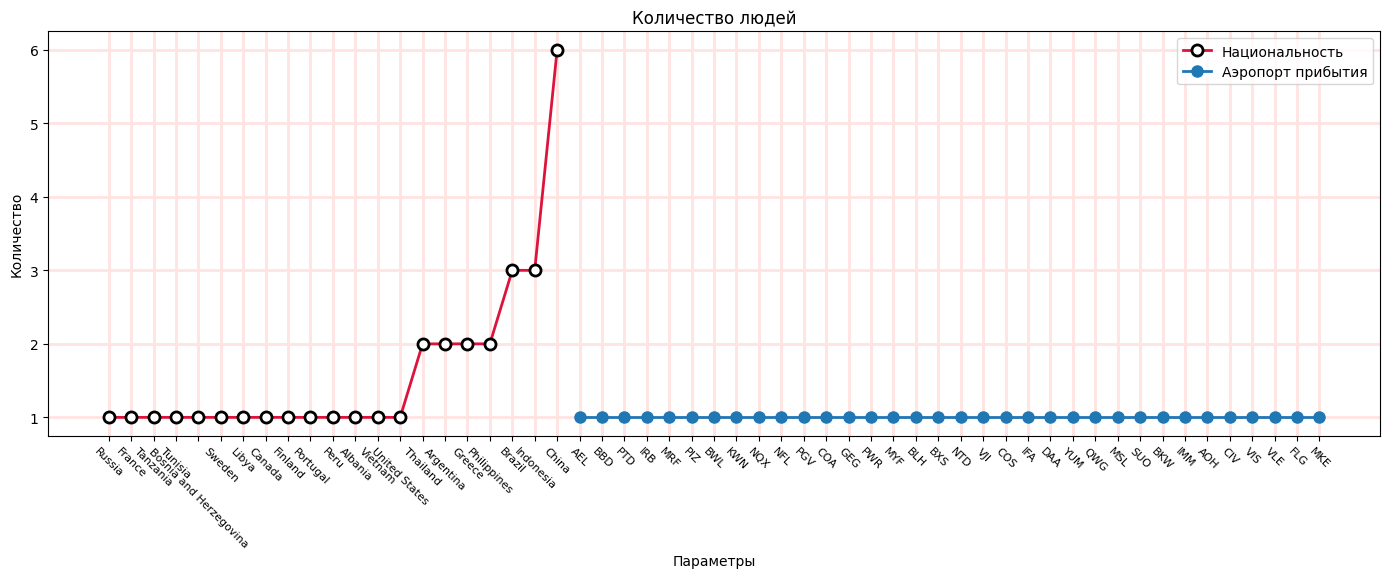

In [ ]:
nationality = list(sorted_country_count.keys())
repeats =  list(sorted_country_count.values())

airport_name = list(sorted_airports.keys())
airport_repeats = list(sorted_airports.values())

plt.figure(figsize=(14, 5))
plt.plot(nationality, repeats, marker='o', label='Национальность',
         linestyle='-', linewidth=2, markersize=8,
         color='crimson', markerfacecolor='white',
         markeredgecolor='black', markeredgewidth=2)


plt.plot(airport_name, airport_repeats, marker='o', label='Аэропорт прибытия',
         linestyle='-', linewidth=2, markersize=8)

# Настроим оси и добавим легенду
plt.xlabel('Параметры')
plt.ylabel('Количество')
plt.title('Количество людей')
plt.legend()

plt.grid(True, linewidth=2, color='mistyrose')

# Отображаем график
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=-45, fontsize=8)  # Поворачиваем метки на оси x на 45 градусов
plt.show()

# Задание 6

In [ ]:
import seaborn as sns
import time
from sklearn import preprocessing
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

In [ ]:
mnist = fetch_openml("Fashion-MNIST", version=1, cache=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X = mnist.data[:1000]
y = mnist.target[:1000]

# Стандартизация данных
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<ipython-input-10-336151fd8c1b>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.astype(int), cmap=plt.cm.get_cmap("viridis", 10))
<ipython-input-10-336151fd8c1b>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.astype(int), cmap=plt.cm.get_cmap("viridis", 10))
<ipython-input-10-336151fd8c1b>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.ast

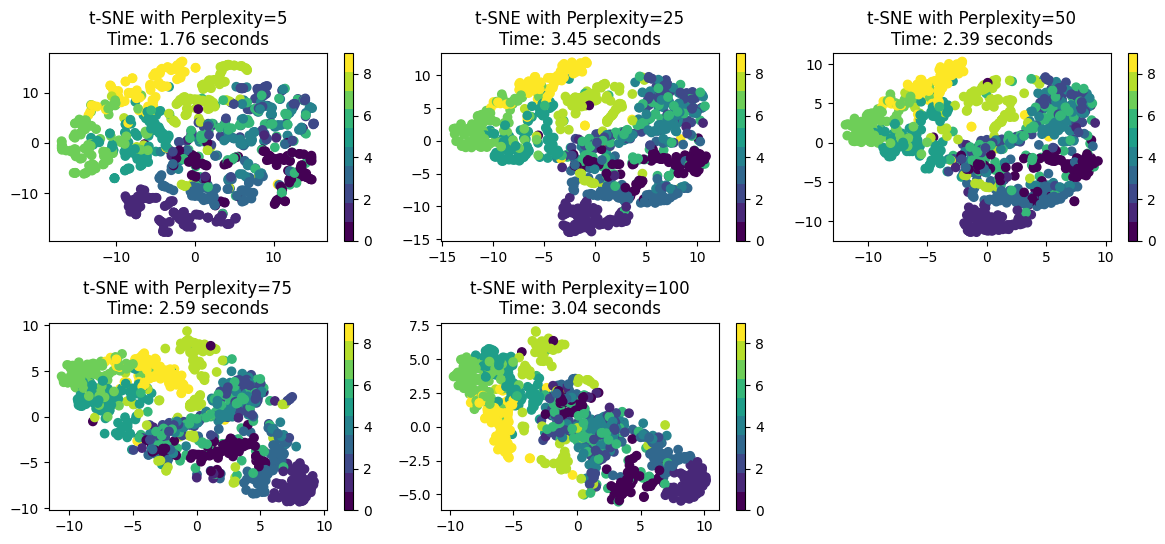

In [ ]:
perplexities = [5, 25, 50, 75, 100]

plt.figure(figsize=(12, 8))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300)

    start_time = time.time()
    X_tsne = tsne.fit_transform(X_std)
    end_time = time.time()

    plt.subplot(3, 3, i+1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.astype(int), cmap=plt.cm.get_cmap("viridis", 10))
    plt.title(f"t-SNE with Perplexity={perplexity}\nTime: {end_time - start_time:.2f} seconds")
    plt.colorbar()

plt.tight_layout()
plt.show()

# Задание 7

In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=e4e570c7a16d33563a121abc17a4163beaf251b129f1f2d76529891e05c6b6a2
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=2225c76f150cfd1b5a06a732272d1b1af2a6423935d2c07ee8db9ff45c18d7b6
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import time

In [ ]:
# Загрузка данных Fashion MNIST
mnist = fetch_openml("Fashion-MNIST", version=1, cache=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
<ipython-input-4-30189d8fdcdb>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y.astype(int), cmap=plt.cm.get_cmap("viridis", 10))
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
<ipython-input-4-30189d8fdcdb>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.

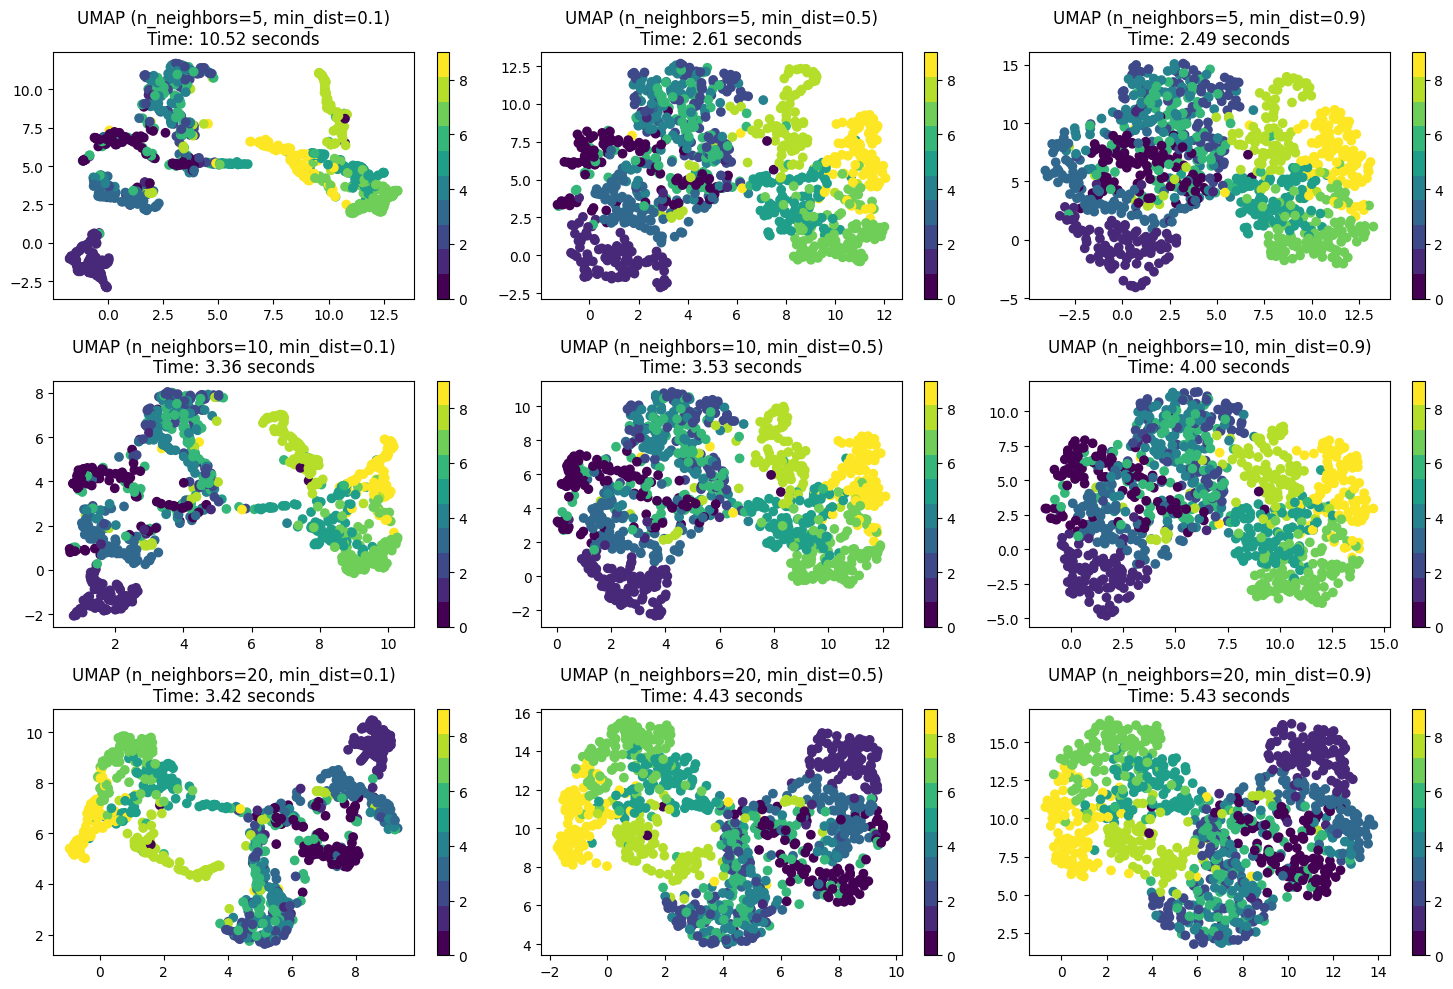

In [ ]:
# Выбор подмножества данных (первые 1000 изображений)
X = mnist.data[:1000]
y = mnist.target[:1000]

# Стандартизация данных
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Параметры для UMAP
n_neighbors_list = [5, 10, 20]
min_dist_list = [0.1, 0.5, 0.9]

plt.figure(figsize=(15, 10))

for i, n_neighbors in enumerate(n_neighbors_list):
    for j, min_dist in enumerate(min_dist_list):
        umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)

        # Измерение времени выполнения UMAP
        start_time = time.time()
        X_umap = umap_model.fit_transform(X_std)
        end_time = time.time()

        plt.subplot(len(n_neighbors_list), len(min_dist_list), i*len(min_dist_list) + j + 1)
        plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y.astype(int), cmap=plt.cm.get_cmap("viridis", 10))
        plt.title(f"UMAP (n_neighbors={n_neighbors}, min_dist={min_dist})\nTime: {end_time - start_time:.2f} seconds")
        plt.colorbar()

plt.tight_layout()
plt.show()
